In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing, cross_validation, neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

####################IMPORT THE DATABASE
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'income']

train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
train.columns = columns
test.columns = columns

In [20]:
###################Clean the Data

df = pd.concat([train, test], axis=0)
dff=df
k=df

df['income'] = df['income'].apply(lambda x: 1 if x==' >50K' else 0)

for col in df.columns:
    if type(df[col][0]) == str:
        print("Working on " + col)
        df[col] = df[col].apply(lambda val: val.replace(" ",""))

In [21]:
####################REMOVE UNKNOWNS
    
df.replace(' ?', np.nan, inplace=True)###making copy for visualization

In [23]:
#################### Converting to int

df = pd.concat([df, pd.get_dummies(df['workclass'],prefix='workclass',prefix_sep=':')], axis=1)
df.drop('workclass',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['marital_status'],prefix='marital_status',prefix_sep=':')], axis=1)
df.drop('marital_status',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['occupation'],prefix='occupation',prefix_sep=':')], axis=1)
df.drop('occupation',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['relationship'],prefix='relationship',prefix_sep=':')], axis=1)
df.drop('relationship',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['race'],prefix='race',prefix_sep=':')], axis=1)
df.drop('race',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['sex'],prefix='sex',prefix_sep=':')], axis=1)
df.drop('sex',axis=1,inplace=True)

df = pd.concat([df, pd.get_dummies(df['native_country'],prefix='native_country',prefix_sep=':')], axis=1)
df.drop('native_country',axis=1,inplace=True)

df.drop('education', axis=1,inplace=True)

df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass: Federal-gov,workclass: Local-gov,workclass: Never-worked,...,native_country: Portugal,native_country: Puerto-Rico,native_country: Scotland,native_country: South,native_country: Taiwan,native_country: Thailand,native_country: Trinadad&Tobago,native_country: United-States,native_country: Vietnam,native_country: Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 0                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

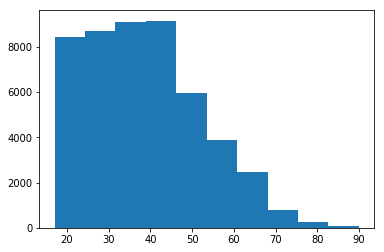

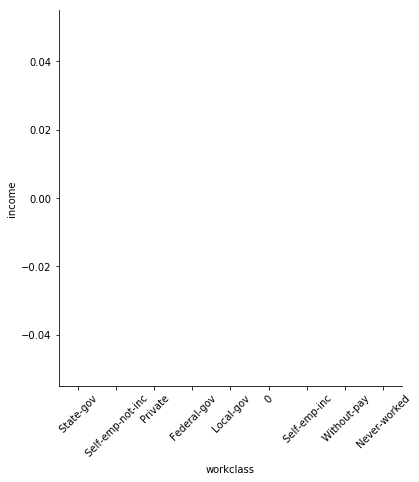

In [32]:
######################## Visualizations #############################
########################################### VISULIZATION ##################################################
###########################################################################################################
###########################################################################################################

plt.hist(dff['age']);

dff['income'] = dff['income'].apply(lambda x: 1 if x==' >50K.' else 0)

dff.replace(' ?', np.nan, inplace=True)
#The output for the this line of code can be viewed at https://tinyurl.com/y8ddex6h
###################################  WORKCLASS
dff.fillna(' 0', inplace=True)

sn.factorplot(x="workclass", y="income", data=dff, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
dff['workclass'].value_counts()


In [28]:
########### Preparing data for Training and testing 

X = np.array(df.drop(['income'], 1))
y = np.array(df['income'])
X = preprocessing.scale(X)
y = np.array(df['income'])

#Splitting data as train and test data 
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [37]:
###############################CLASSIFICATION##################################################
####################################################################################
#########LOGISTIC REGRESSION######################################################

from sklearn.metrics import accuracy_score
lrn = LogisticRegression(penalty = 'l1', C = .001, class_weight='balanced')

lrn.fit(X_train, y_train)
y_pred = lrn.predict(X_test)

##########Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
LRA = accuracy_score(y_test, y_pred)
print("The Accuracy for Logistic Regression is {}".format(LRA))

[[5407 2752]
 [ 205 1405]]
             precision    recall  f1-score   support

          0       0.96      0.66      0.79      8159
          1       0.34      0.87      0.49      1610

avg / total       0.86      0.70      0.74      9769

The Accuracy for Logistic Regression is 0.6973078104207187


In [38]:
################LDA Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics


clf = LinearDiscriminantAnalysis()
clf.fit( X_train, y_train )
tree_predict = clf.predict(X_test)
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
LDA = accuracy_score(y_test, tree_predict)
print("The Accuracy for LDA is {}".format(LDA))

C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[7806  353]
 [1130  480]]
             precision    recall  f1-score   support

          0       0.87      0.96      0.91      8159
          1       0.58      0.30      0.39      1610

avg / total       0.82      0.85      0.83      9769

The Accuracy for LDA is 0.8481932644078206


In [39]:
#######################################LINEAR REGRESSION#######################

from sklearn import linear_model
from sklearn.metrics import accuracy_score

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_lmpre = lm.predict(X_test)

ylm = np.around(y_lmpre)

lm.score(X_train, y_train)
lm.coef_
lm.intercept_

##########Results

print(confusion_matrix(y_test,ylm))
print(classification_report(y_test,ylm))

LA = accuracy_score(y_test, ylm)
print("The Accuracy for Linear Regression is {}".format(LA))

[[8072   87]
 [1456  154]]
             precision    recall  f1-score   support

          0       0.85      0.99      0.91      8159
          1       0.64      0.10      0.17      1610

avg / total       0.81      0.84      0.79      9769

The Accuracy for Linear Regression is 0.8420513870406388


In [40]:
############################################## KNN ###############

from sklearn import preprocessing, cross_validation, neighbors
from sklearn.metrics import accuracy_score

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

knnpre = clf.predict(X_test)


In [42]:
##########Results

print(confusion_matrix(y_test,knnpre))
print(classification_report(y_test,knnpre))
KKNA = accuracy_score(y_test, knnpre)
print("The Accuracy for KNN is {}".format(KKNA))

[[7601  558]
 [1093  517]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90      8159
          1       0.48      0.32      0.39      1610

avg / total       0.81      0.83      0.82      9769

The Accuracy for KNN is 0.8309960077797113


In [43]:
################################ Decision tree ###########################################

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn import metrics

clf_tree = DecisionTreeClassifier( max_depth = 4 )

clf_tree.fit( X_train, y_train )
tree_predict = clf_tree.predict( X_test )
metrics.accuracy_score( y_test, tree_predict )

print(confusion_matrix(y_test,tree_predict))
print(classification_report(y_test,tree_predict))
DTA = accuracy_score(y_test, tree_predict)
print("The Accuracy for Decision Tree Model is {}".format(DTA))

[[7990  169]
 [1230  380]]
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      8159
          1       0.69      0.24      0.35      1610

avg / total       0.84      0.86      0.83      9769

The Accuracy for Decision Tree Model is 0.8567918927218753


In [44]:
################################ SVM #####################################

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

svc = SVC(C = 1.0, kernel = "linear" )
svc.fit( X_train, y_train )
svc_predict = svc.predict( X_test )

print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))
SVMA = accuracy_score(y_test, svc_predict)
print("The Accuracy for SVM is {}".format(SVMA))


C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[[8148   11]
 [1583   27]]
             precision    recall  f1-score   support

          0       0.84      1.00      0.91      8159
          1       0.71      0.02      0.03      1610

avg / total       0.82      0.84      0.77      9769

The Accuracy for SVM is 0.8368307912785341


In [47]:
####################### NAIVE  #####################################

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
naive_pre= model.predict(X_test)
print (naive_pre)
##result
print(confusion_matrix(y_test,naive_pre))
print(classification_report(y_test,naive_pre))
NBA = accuracy_score(y_test, naive_pre)
print("The Accuracy for NB is {}".format(NBA))

[0 1 1 ... 0 1 0]
[[2370 5789]
 [  45 1565]]
             precision    recall  f1-score   support

          0       0.98      0.29      0.45      8159
          1       0.21      0.97      0.35      1610

avg / total       0.85      0.40      0.43      9769

The Accuracy for NB is 0.4028047906643464


In [48]:

#######################XGB experiementing with learning rate
#This code is to let algorithm figure out itself, which value for learning rate is best 

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


 

from matplotlib import pyplot
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

#The output for this of code can be found at  https://tinyurl.com/y7cmzkox

#Learning rate graph can be viewed at : https://tinyurl.com/ycg4eqeh

############## This xgboost code is where I experiment which learning rate and what number of estimators are BEST

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy
from matplotlib import pyplot
from pandas import read_csv
# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
############# XGboost - Picking the best values for learning rate and estimators  

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(learning_rate=0.1,
                           n_estimators=500,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(X_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(X_test)
print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(X_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))